# Perkenalan

=======================================================

Graded Challenge 7

Nama : Jeni Kasturi

Batch : FTDS_BSD_2

Memprediksi kisaran usia berdasarkan bentuk wajah apakah usianya termasuk antara 18-60 tahun dari database [kaggle]('https://www.kaggle.com/datasets/trainingdatapro/age-detection-human-faces-18-60-years?select=test')

=====================================================

---

# Model Inference

Dalam tahap ini model yang telah kita latih digunakan kembali untuk membuat prediksi atau membuat estimasi berdasarkan data baru.

## 1. Import Libraries

Import semua library yang dibutuhkan dalam projek.

In [1]:
import requests
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Load Model

Kita akan panggil modelnya untuk menjalankan programnya.

In [2]:
model = load_model("best_model.h5")

## 3. Load Data Inference

Langkah selanjunya adalah kita coba ambil beberapa sampel gambar wajah untuk melatih model dan melihat hasil prediksinya apakah sudah akurat atau belum. 

In [3]:
urls = ['https://cdn.antaranews.com/cache/1200x800/2023/05/05/collage-2023-05-05T101923.163.jpg',
        'https://media.matamata.com/thumbs/2020/08/13/37755-mario-lawalata-instagramatlawalata13/745x489-img-37755-mario-lawalata-instagramatlawalata13.jpg',
        'https://thumb.viva.co.id/media/frontend/thumbs3/2020/01/23/5e295b86e7897-tissa-biani_375_211.jpg',
        'https://i.pinimg.com/originals/ab/5c/cc/ab5cccb20c736a07672622a118c98fe8.jpg',
        'https://akcdn.detik.net.id/community/media/visual/2020/11/22/caroline-labouchere-6.jpeg?w=770&q=90']

for index, url in enumerate(urls):
  response = requests.get(url)
  filename = 'img-test-' + str(index+1) + '.jpg'
  file = open(filename, "wb")
  file.write(response.content)
  file.close()

Setelah kita mengambil beberapa sample, langkah selanjutnya yaitu kita bikin classnya agar model dapat menentukan dari gambar tersebut termasuk class usia yang manakah yang tepat.

In [4]:
# create class name
class_names = ["18-20", "21-30", "31-40", "41-50", "51-60"]

class_names

['18-20', '21-30', '31-40', '41-50', '51-60']

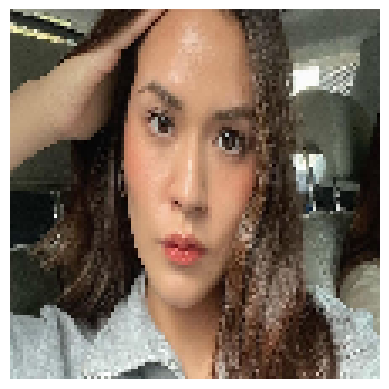

1/1 [==============================] - 5s 5s/step
Result     :  [[2.55367886e-02 1.01641461e-01 3.20263982e-01 4.50773060e-01
  1.00958012e-01 1.25028391e-05 1.76343950e-04 1.02123427e-04
  1.75098489e-06 1.02367067e-05 1.55559562e-07 1.06423526e-04
  1.07335683e-04 3.03686800e-04 6.19157981e-06]]
Max Class  :  3
Class Name :  41-50



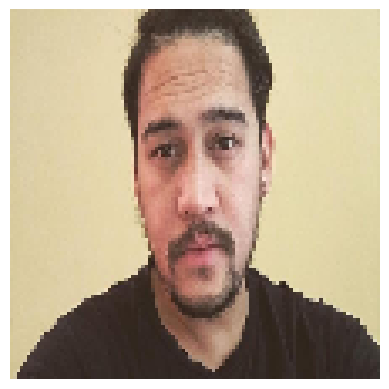

1/1 [==============================] - 1s 558ms/step
Result     :  [[5.6716275e-01 9.5012613e-02 6.8451278e-02 2.1973880e-02 2.4213830e-01
  8.0818677e-04 2.9425835e-04 8.3634170e-04 7.7036566e-05 5.9201836e-04
  2.3660859e-05 7.4316608e-04 3.2399569e-04 1.1856153e-03 3.7694647e-04]]
Max Class  :  0
Class Name :  18-20



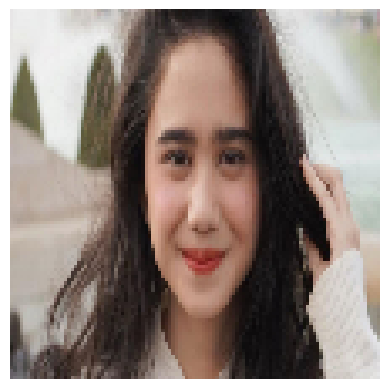

1/1 [==============================] - 0s 234ms/step
Result     :  [[4.0464213e-01 4.9520972e-01 6.6916555e-02 2.5749186e-02 6.5783742e-03
  8.2740708e-06 2.5369363e-05 9.8401862e-05 9.4432680e-06 2.7836388e-06
  2.9279238e-07 3.8671642e-05 5.7917248e-05 6.4887106e-04 1.3991495e-05]]
Max Class  :  1
Class Name :  21-30



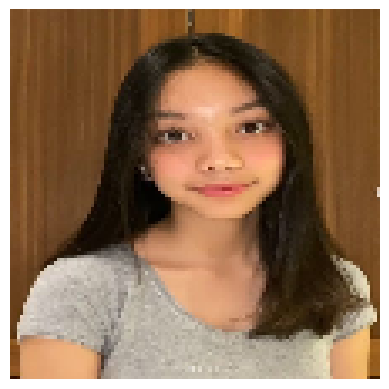

1/1 [==============================] - 0s 271ms/step
Result     :  [[3.9142337e-01 4.7559828e-01 8.7220676e-02 1.0686115e-02 3.1478714e-02
  1.1834021e-04 8.7192726e-05 7.5008289e-04 6.8136171e-05 5.2027626e-05
  3.1454117e-06 6.2312942e-04 1.9561213e-04 1.6401756e-03 5.4992179e-05]]
Max Class  :  1
Class Name :  21-30



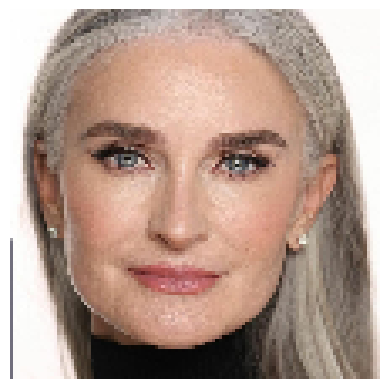

1/1 [==============================] - 0s 297ms/step
Result     :  [[2.1020353e-01 3.6020505e-01 1.6856617e-01 3.5388898e-02 2.2306879e-01
  2.8246228e-04 2.9815390e-04 7.3910254e-04 1.5886058e-05 5.5010834e-05
  1.6011820e-06 3.7632935e-04 1.8407694e-04 5.8263680e-04 3.2288142e-05]]
Max Class  :  1
Class Name :  21-30



In [5]:
# Test Images

img_paths = ['img-test-1.jpg', # usia 33
             'img-test-2.jpg', # usia 43
             'img-test-3.jpg', # usia 21
             'img-test-4.jpg', # usia 18
             'img-test-5.jpg'  # usia 55
             ]

target_size = (110, 110)  # Or whatever dimensions you prefer

for filename in img_paths:
  img = image.load_img(filename, target_size=target_size)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)

  img_batch = img_batch / 255.0

  prediction_inf = model.predict(img_batch)
  result_max_proba = prediction_inf.argmax(axis=-1)[0]
  result_class = class_names[result_max_proba]

  print('Result     : ', prediction_inf)
  print('Max Class  : ', result_max_proba)
  print('Class Name : ', result_class)
  print('')